<h1>Importing The Libraries And The Data</h1>

In [393]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [395]:
df = pd.read_csv('loan.csv')

In [396]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<h2>cleaning the Data</h2>

In [402]:
#find the number of columns have only null or NAN values
len(df.columns[df.isnull().mean() == 1])


54

In [404]:
len(df.columns[df.isnull().mean()*100 == 100])

54

In [406]:
#drop the columns with only null or NAN values and storing into new dataframe
df1 = df.dropna(axis=1, how='all')

In [408]:
df1.shape

(39717, 57)

In [410]:
# Droping additional columns which have almost nulls and not requied for analysis.

columns_drop_list = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","member_id","url","emp_title","zip_code","tax_liens"]
df1.drop(labels = columns_drop_list, axis =1, inplace=True)

In [412]:
df1.shape

(39717, 48)

In [414]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


<h3>analysing the column id</h3>

In [417]:
# finding the duplicate Ids 
total_rows = df1.shape[0]
unique_rows= len(df1['id'].unique())
print('total count',total_rows)
print('unique ids',unique_rows)

total count 39717
unique ids 39717


<h2>Data conversion</h2>

In [420]:
#convert the loan_amnt and funded_amnt as float type
df1 = df1.astype({'loan_amnt':'float','funded_amnt':'float'})

In [422]:
#conerting the term column to integer by removing the text
df1['term'] = df1['term'].apply(lambda x : int(x[:-7]))


In [424]:
# Convert the int_rate float type by removing %
df1['int_rate'] = df1['int_rate'].apply(lambda x : float(x[:-1]))

In [426]:
#Round off the float columns to 2 decimal points
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df1[col] = df1[col].apply(lambda x: round(x,2))

In [428]:
df1.shape

(39717, 48)

In [430]:
# format employment length column to have ineger value only
df1.emp_length.fillna('0',inplace=True)
df1['emp_length']=df1.emp_length.str.extract('(\d+)')
df1.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [432]:
df1.emp_length.value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: count, dtype: int64

In [434]:
# finding blank rows and removing from dataframe for the column pub_rec_bankruptcies
print('blank rows for the column pub_rec_bankruptcies before', df1['pub_rec_bankruptcies'].isna().sum(), "\n")
df1 = df1[df1['pub_rec_bankruptcies'].notna()]
print('blank rows for the column pub_rec_bankruptcies after', df1['pub_rec_bankruptcies'].isna().sum(), "\n")


blank rows for the column pub_rec_bankruptcies before 697 

blank rows for the column pub_rec_bankruptcies after 0 



In [436]:
#Adding new columns month and year to dataframe for further analysis
df1.issue_d = pd.to_datetime(df1.issue_d, format='%b-%y')
df1['year']=df1['issue_d'].dt.year
df1['month']=df1['issue_d'].dt.month

df1.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12


<h3>Univariate Analysis</h3>

In [439]:
df1['loan_amnt'].describe()


count    39020.000000
mean     11242.004741
std       7472.992773
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

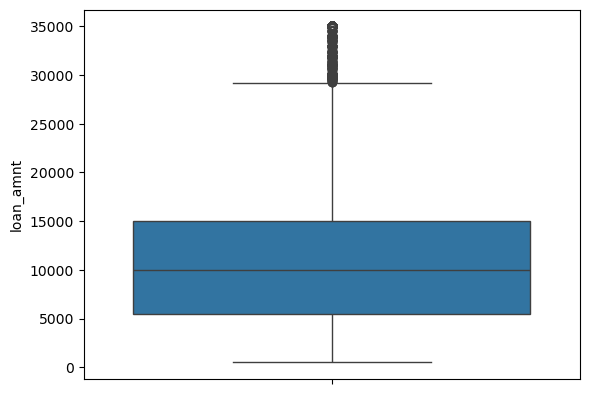

In [441]:
# Plot the box plot for loan amount

sns.boxplot(df1['loan_amnt'])
plt.show()

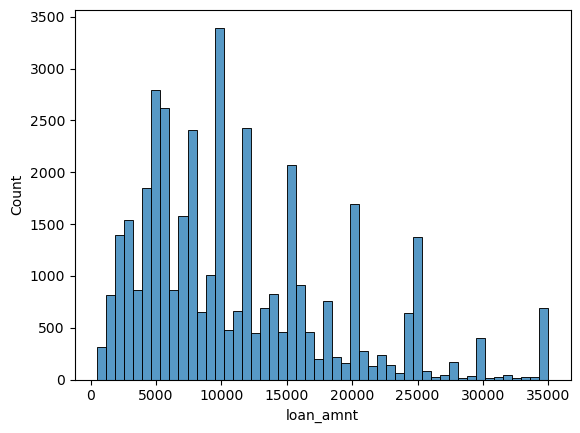

In [443]:
# histogram plot to see the distribution of loan amount

sns.histplot(df1['loan_amnt'], bins = 50)
plt.show()

In [445]:
df1['funded_amnt'].describe()


count    39020.000000
mean     10967.680677
std       7200.731107
min        500.000000
25%       5400.000000
50%       9650.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

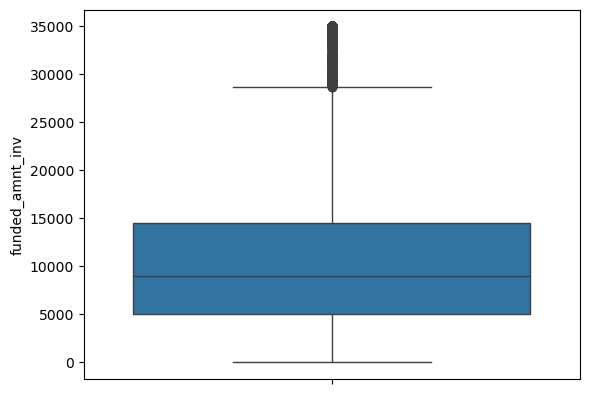

In [446]:
sns.boxplot(df1['funded_amnt_inv'])
plt.show()

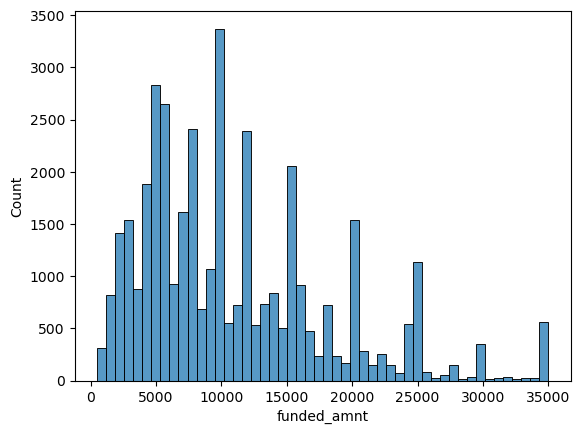

In [447]:
sns.histplot(df1['funded_amnt'], bins = 50)
plt.show()

In [450]:
df1['funded_amnt_inv'].describe()

count    39020.000000
mean     10541.094961
std       7104.340837
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14475.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

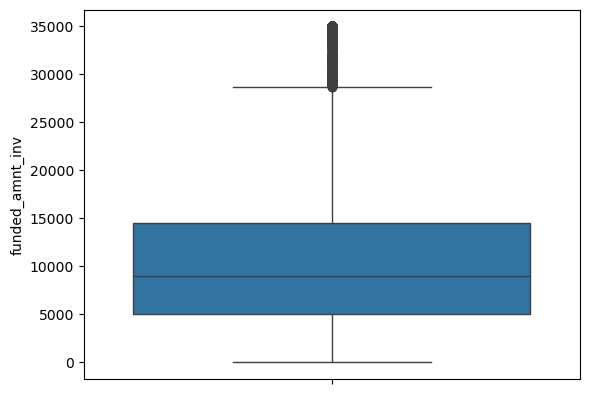

In [452]:
sns.boxplot(df1['funded_amnt_inv'])
plt.show()

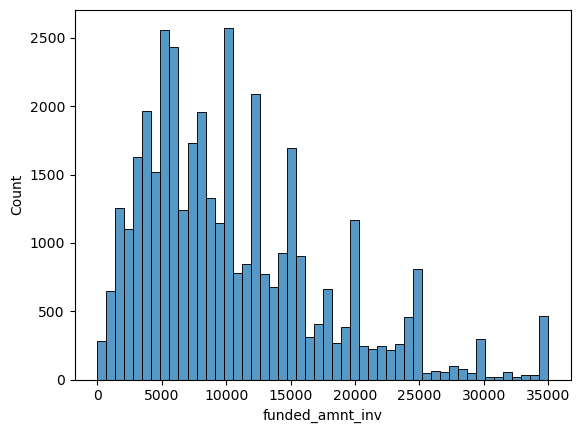

In [454]:
sns.histplot(df1['funded_amnt_inv'], bins = 50)
plt.show()

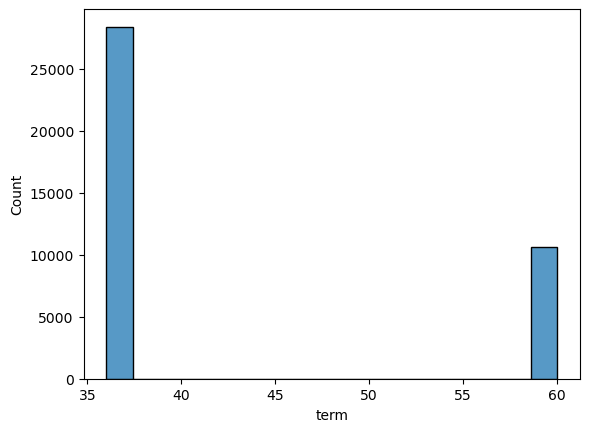

In [457]:
sns.histplot(df1["term"])
plt.show()

In [459]:
df1['int_rate'].describe()


count    39020.000000
mean        12.045844
std          3.743006
min          5.420000
25%          9.250000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64

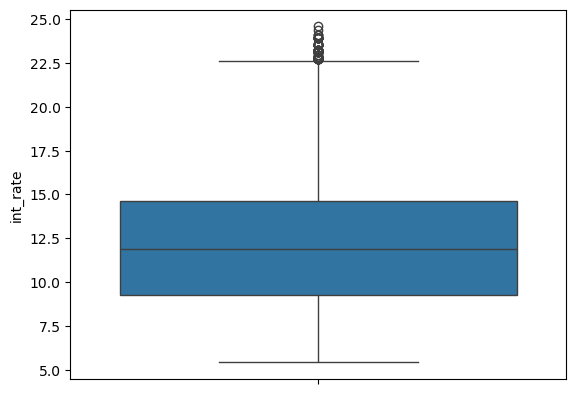

In [461]:
sns.boxplot(df1['int_rate'])
plt.show()

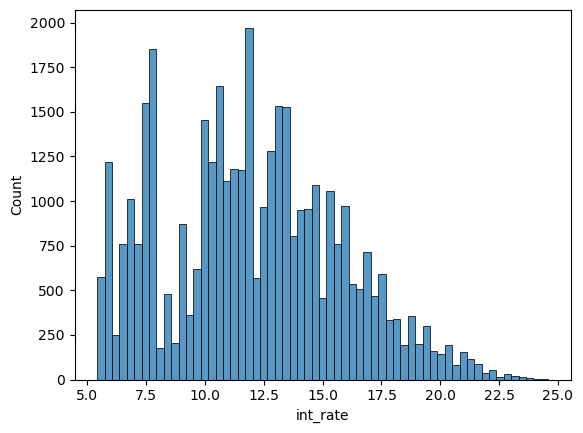

In [463]:
sns.histplot(df1["int_rate"])
plt.show()

In [465]:
# categeroging the interest rates and storing them in new column to analyse more on this

def interest_cat(x):
    if x < 9.25:
        return 'Low'
    elif x>= 9.25 and x < 11.86:
        return 'Medium'
    elif x>= 11.86 and x < 14.59:
        return 'Medium High'
    elif x >= 14.49 and x < 20:
        return 'High'
    else:
        return 'Too High'

df1['int_rate_cat']  = df1['int_rate'].apply(interest_cat)


In [467]:
round(df1.int_rate_cat.value_counts(normalize = True)*100,2)

int_rate_cat
Medium High    25.02
Low            24.89
Medium         24.67
High           23.18
Too High        2.23
Name: proportion, dtype: float64

<h5>Analysis on Grades</h5>

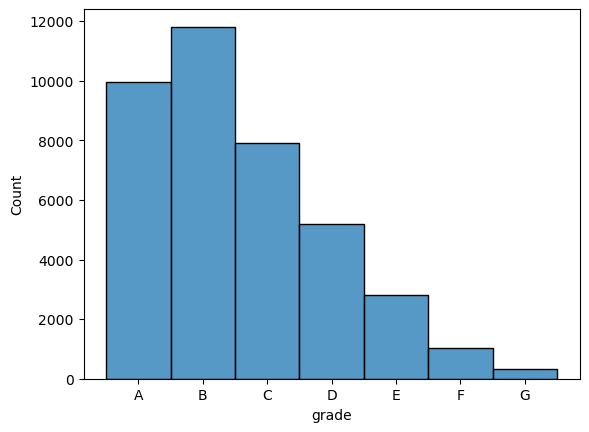

In [470]:
sns.histplot(df1['grade'].sort_values())
plt.show()

In [471]:
#find out the count of subgrades for each grade 
df1[['grade','sub_grade','id']].groupby(by = ['grade','sub_grade']).count()



id
grade sub_grade      
A     A1         1128
      A2         1478
      A3         1771
      A4         2856
      A5         2710
B     B1         1787
      B2         2011
      B3         2881
      B4         2470
      B5         2662
C     C1         2085
      C2         1978
      C3         1494
      C4         1201
      C5         1157
D     D1          903
      D2         1323
      D3         1152
      D4          958
      D5          860
E     E1          754
      E2          647
      E3          550
      E4          445
      E5          411
F     F1          326
      F2          244
      F3          182
      F4          165
      F5          117
G     G1          103
      G2           78
      G3           48
      G4           56
      G5           29

plotting subgrade for grade  A


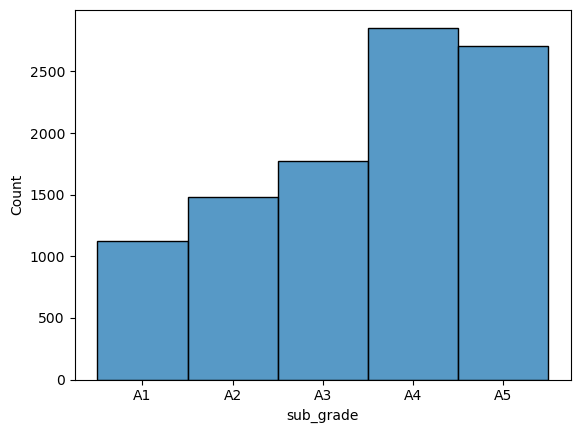

plotting subgrade for grade  B


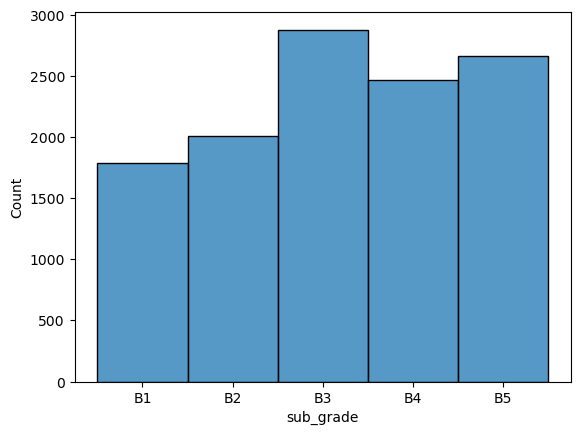

plotting subgrade for grade  C


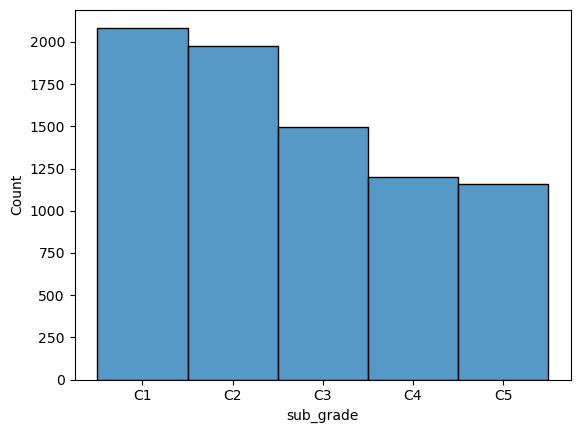

plotting subgrade for grade  D


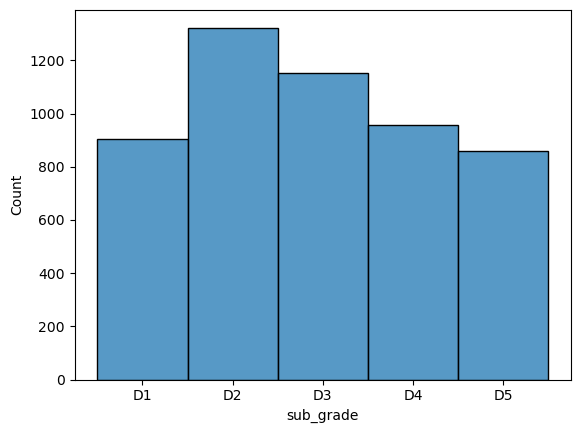

plotting subgrade for grade  E


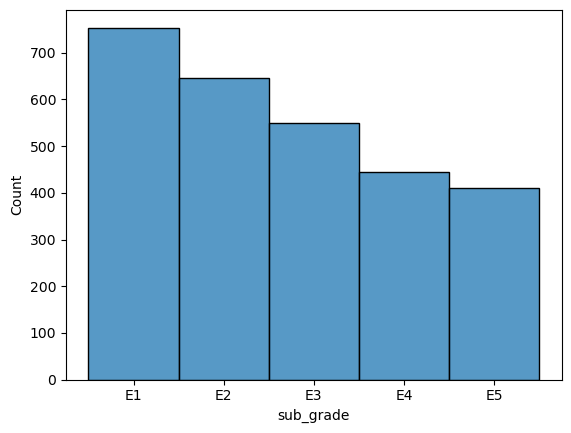

plotting subgrade for grade  F


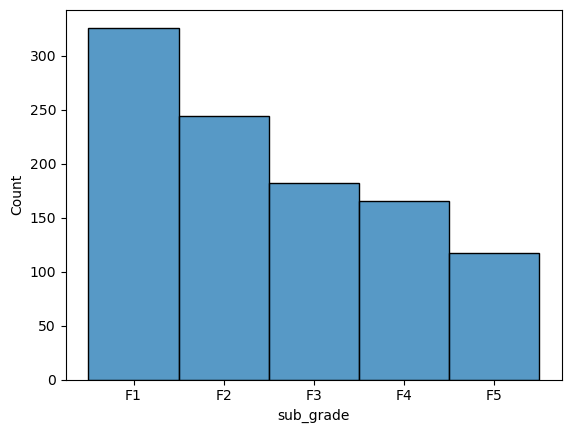

plotting subgrade for grade  G


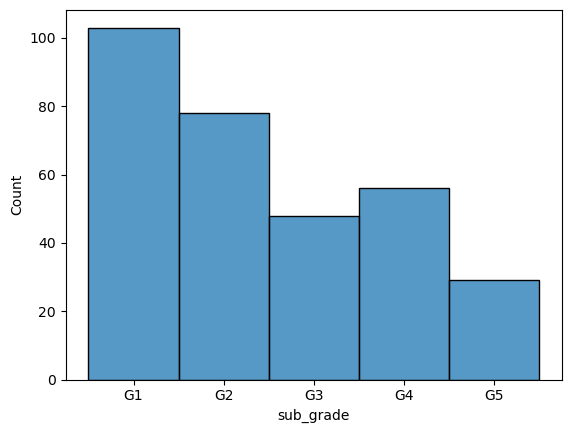

In [474]:
#plot for each subgrades 
for grd in df1['grade'].sort_values().unique():
    print('plotting subgrade for grade ',grd)
    sns.histplot(df1[df1['grade'] == grd]['sub_grade'].sort_values())
    plt.show()

<h5>Analysis on home_ownership</h5>

In [476]:
round(df1.home_ownership.value_counts(normalize = True)*100,2)


home_ownership
RENT        47.46
MORTGAGE    44.61
OWN          7.68
OTHER        0.25
Name: proportion, dtype: float64

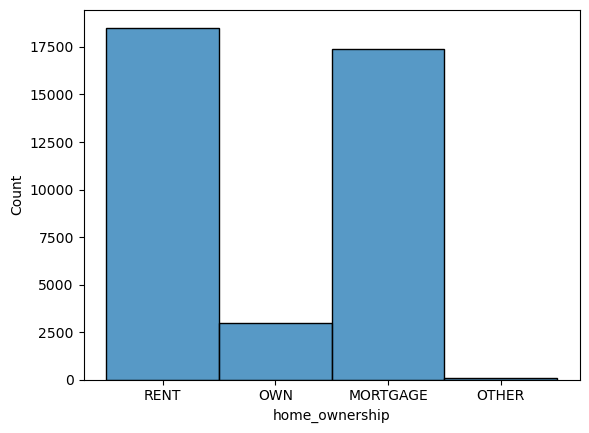

In [477]:
sns.histplot(df1.home_ownership)
plt.show()

<h2>Univariate Analysis</h2>

<h4>Quantitative Variable Analysis</h4>

In [483]:
def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()

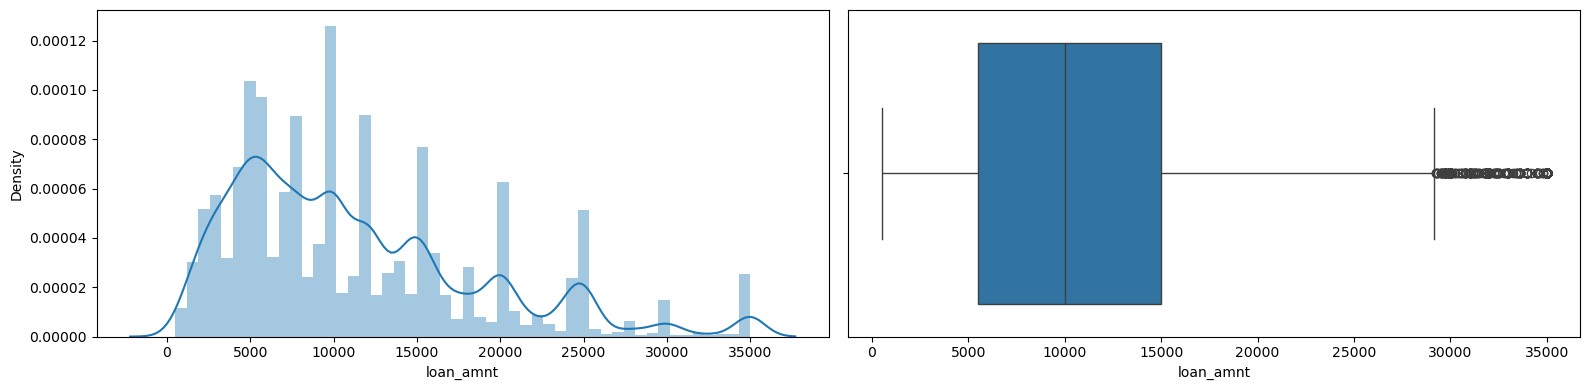

In [485]:
univariate_analysis(df1, 'loan_amnt')

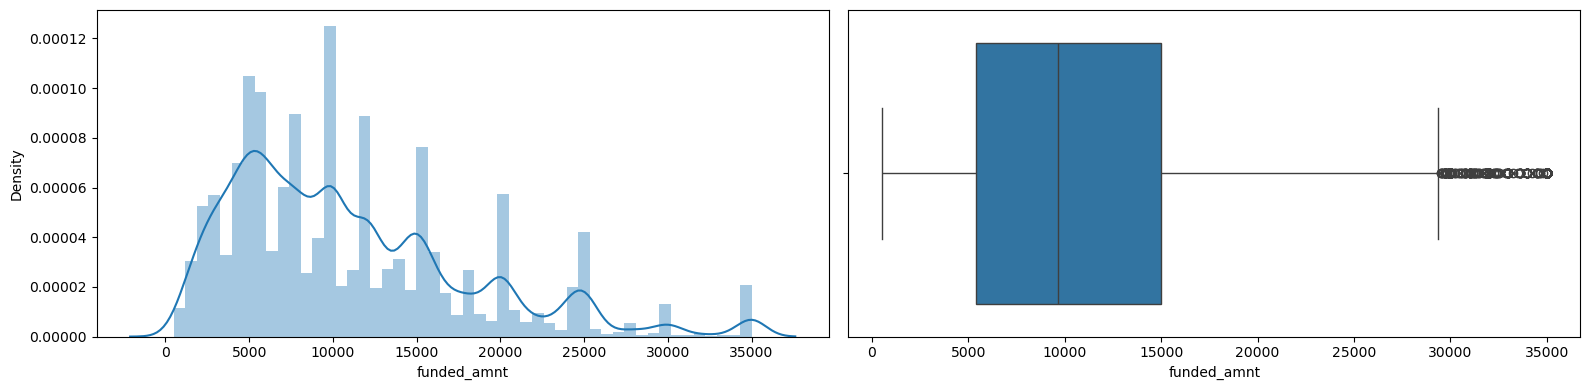

In [486]:
univariate_analysis(df1, 'funded_amnt')


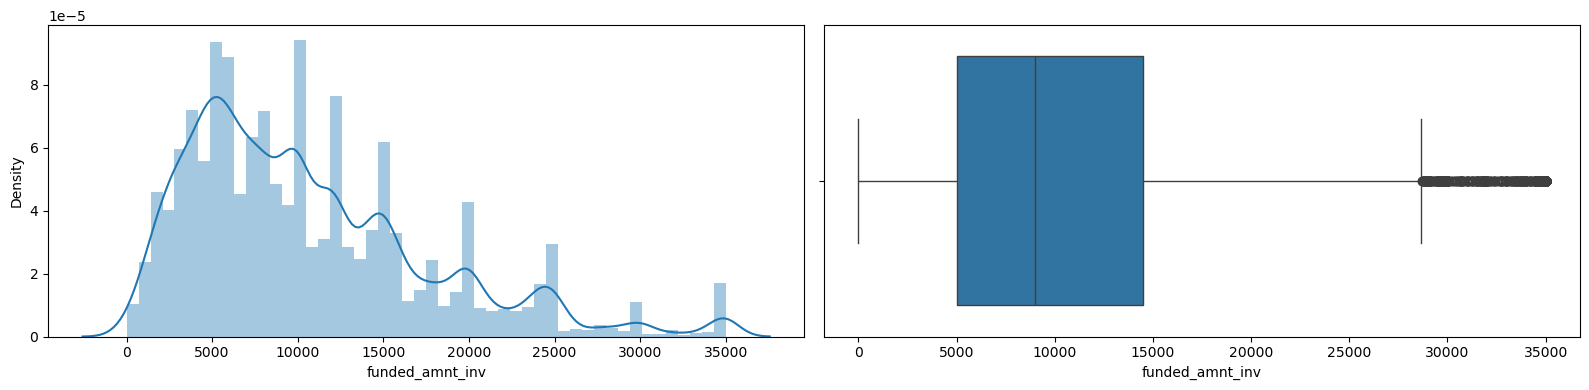

In [488]:
univariate_analysis(df1, 'funded_amnt_inv')

<h4>Unordered Categorical Variable Analysis
</h4>

<Axes: xlabel='purpose'>

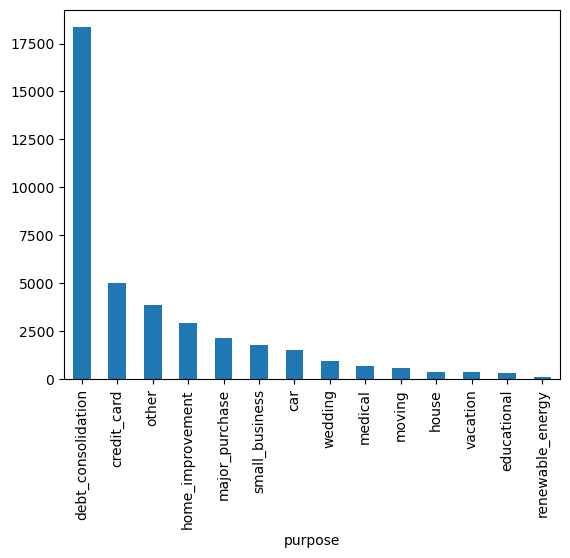

In [492]:
df1['purpose'].value_counts().plot.bar()

<Axes: xlabel='addr_state'>

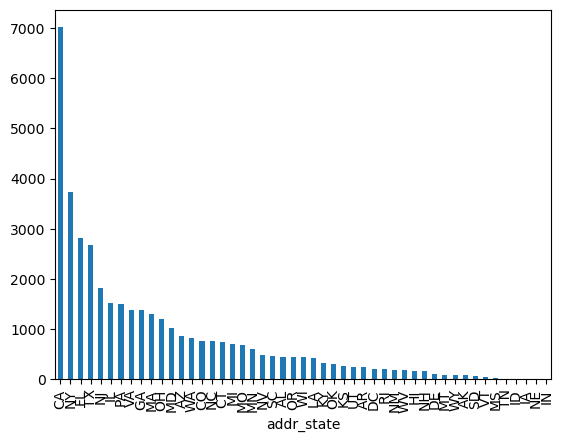

In [494]:
df1['addr_state'].value_counts().plot.bar()


<h4>Ordered Categorical Variable Analysis</h4>

<Axes: xlabel='term'>

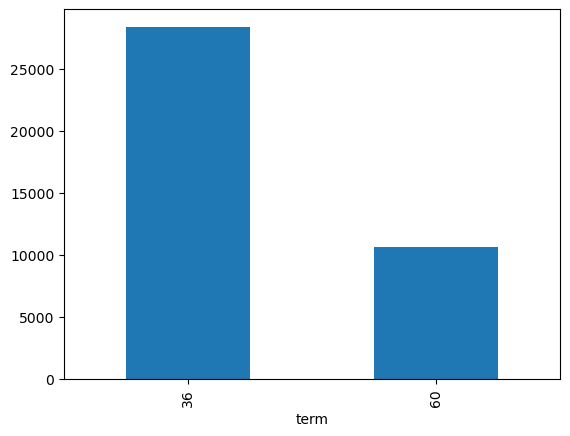

In [497]:
df1['term'].value_counts().plot.bar()

<Axes: xlabel='pub_rec_bankruptcies'>

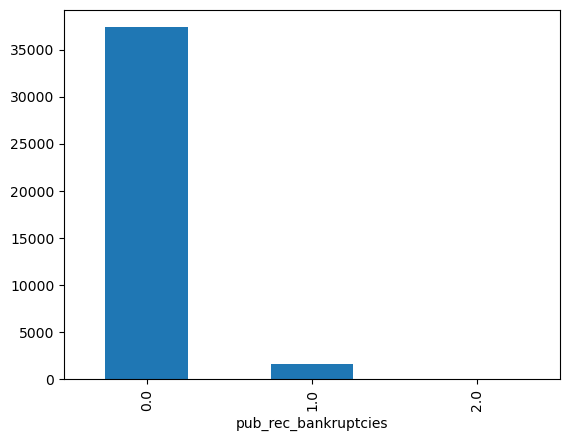

In [499]:
df1['pub_rec_bankruptcies'].value_counts().plot.bar()


<Axes: xlabel='emp_length'>

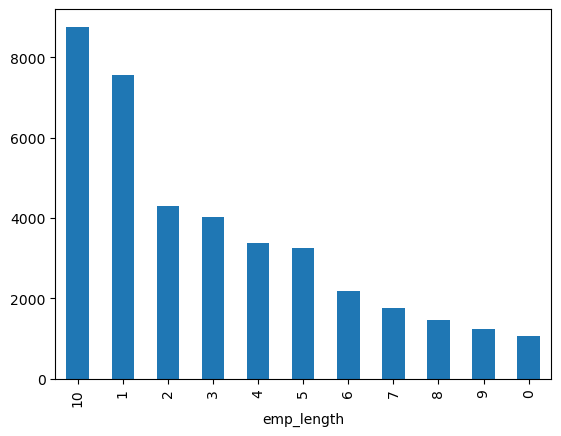

In [501]:
df1['emp_length'].value_counts().plot.bar()


<h4>Derived Variable Analysis
</h4>

<Axes: xlabel='year'>

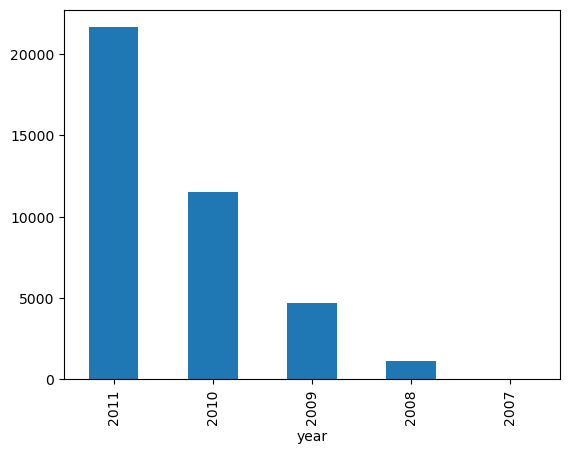

In [504]:
df1['year'].value_counts().plot.bar()


<Axes: xlabel='month'>

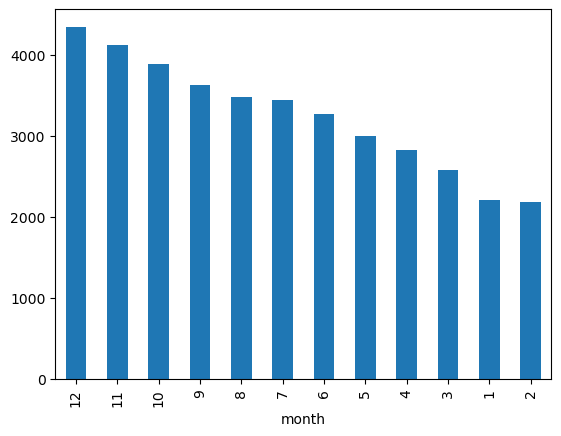

In [506]:
df1['month'].value_counts().plot.bar()


<h2>Bivariate Analysis</h2>

<h5>Loan Status VS Term</h5>

In [510]:
#remove the rows where loan stutus is Current as its on going and we can't use it for analysis
df1 = df1[~(df1['loan_status'] == 'Current')]

In [512]:
#creating new derived column to analyse charged off and paid off vs Term
df1['Defaulted'] = df1['loan_status'].apply(lambda x : 1 if x == 'Charged Off' else 0)


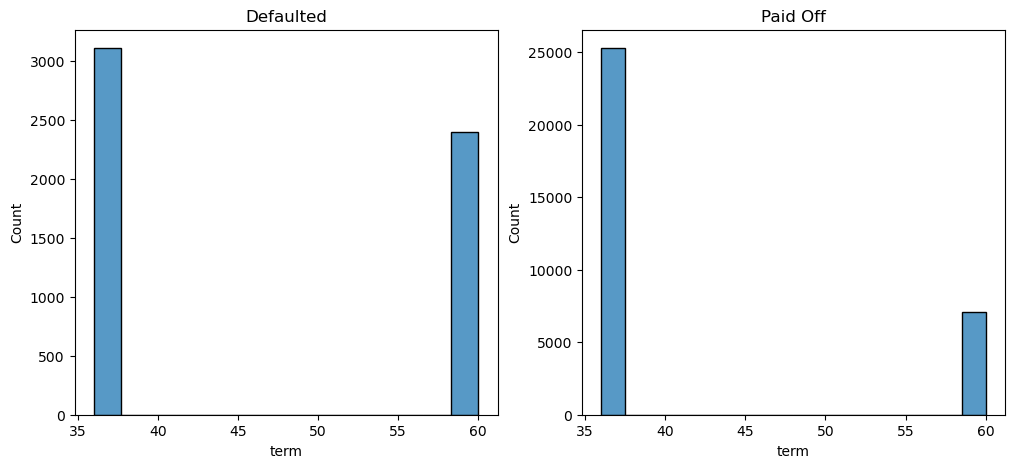

In [514]:
# analyse the relation between dafult and term of a loan
fig, ax = plt.subplots(1,2,sharex=True, figsize = (12,5))
fully_paid = df1[df1['loan_status'] == 'Fully Paid']
defaulted = df1[df1['loan_status'] == 'Charged Off']
sns.histplot(defaulted.term, ax = ax[0]).set(title = 'Defaulted')
sns.histplot(fully_paid.term, ax = ax[1]).set(title = 'Paid Off')
plt.show()


<h4>Loan Status VS Grade & Sub Grades</h4>

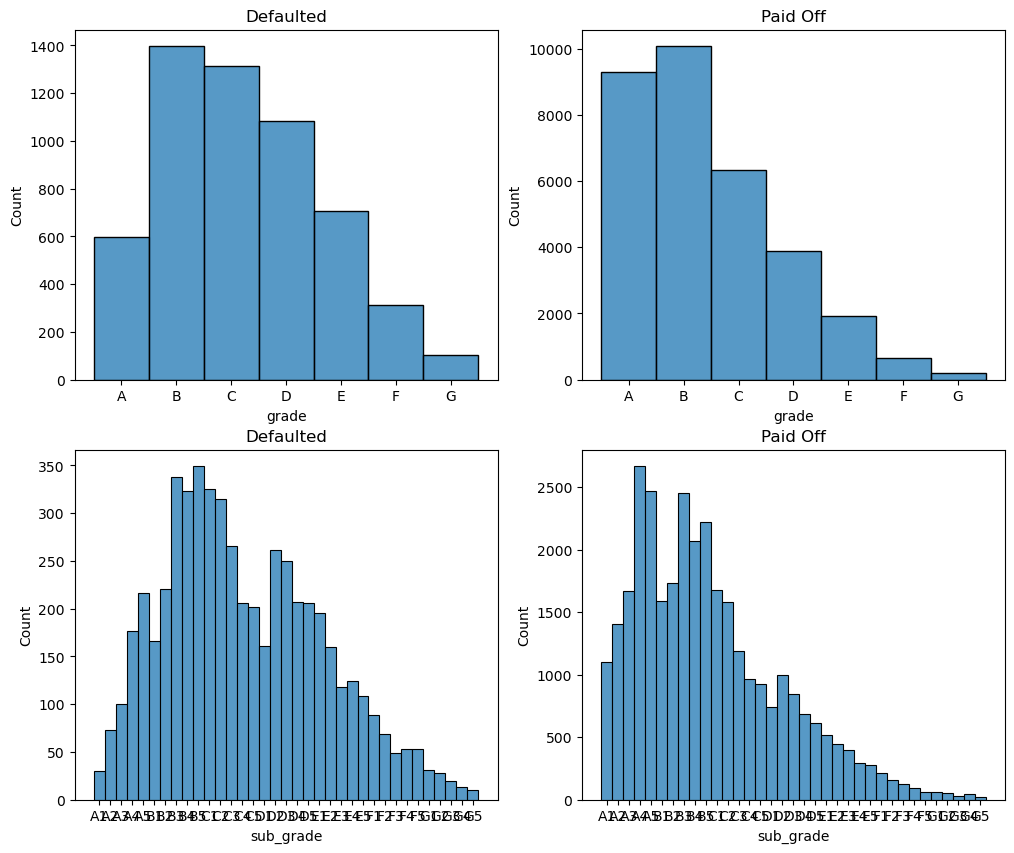

In [517]:
fig, ax = plt.subplots(2,2,sharex=False, figsize = (12,10))
sns.histplot(defaulted.grade.sort_values(), ax = ax[0,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.grade.sort_values(), ax = ax[0,1]).set(title = 'Paid Off')

sns.histplot(defaulted.sub_grade.sort_values(), ax = ax[1,0]).set(title = 'Defaulted')
sns.histplot(fully_paid.sub_grade.sort_values(), ax = ax[1,1]).set(title = 'Paid Off')

plt.show()

In [521]:
df1['annual_income_category'] = pd.cut(df1['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

In [523]:
def analysis_vs_loan_status(df1, col1,col2):
    col1_vs_loan = df1.groupby([col1, col2]).loan_status.count().unstack().fillna(0).reset_index()
    col1_vs_loan['Total'] = col1_vs_loan['Charged Off'] + col1_vs_loan['Fully Paid']
    col1_vs_loan['Chargedoff_Ratio'] = col1_vs_loan['Charged Off'] / col1_vs_loan['Total']
    #print(col1_vs_loan.sort_values('Chargedoff_Ratio', ascending=False))
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax1=sns.barplot(x=col1, y='Chargedoff_Ratio', data=col1_vs_loan.sort_values('Chargedoff_Ratio', ascending=False))
    plt.xticks(rotation=90)
    plt.show()

<h5>Loan status VS Income</h5>

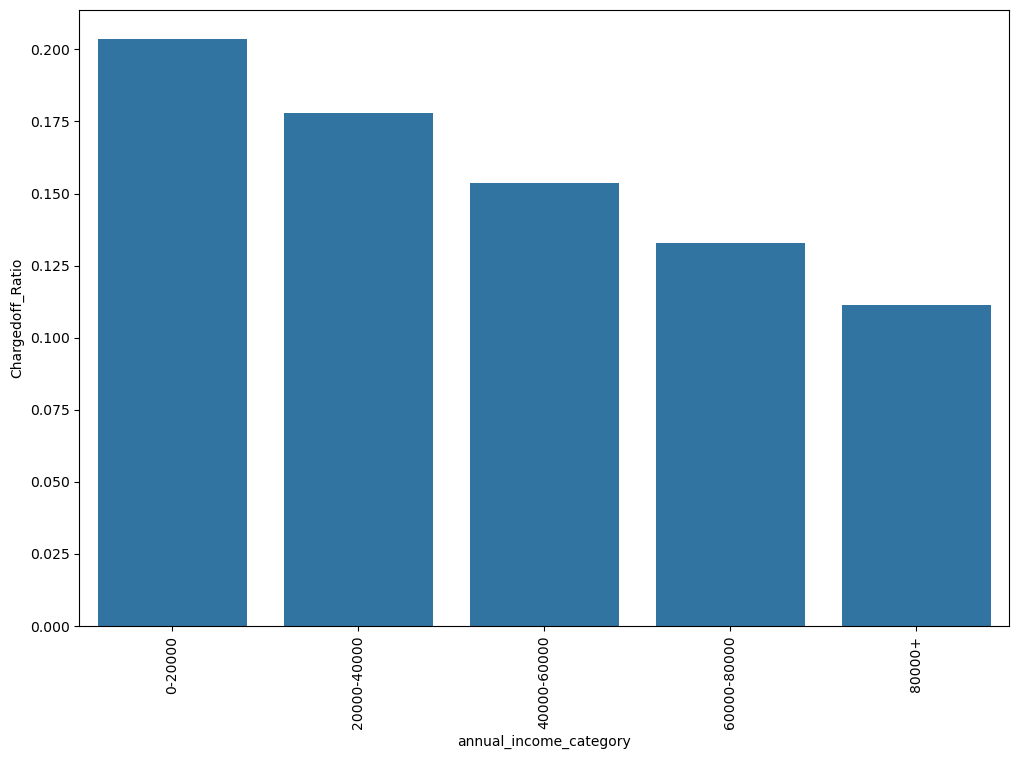

In [526]:
analysis_vs_loan_status(df1,'annual_income_category','loan_status')

<h5>Loan Status VS Purpose of Loan</h5>

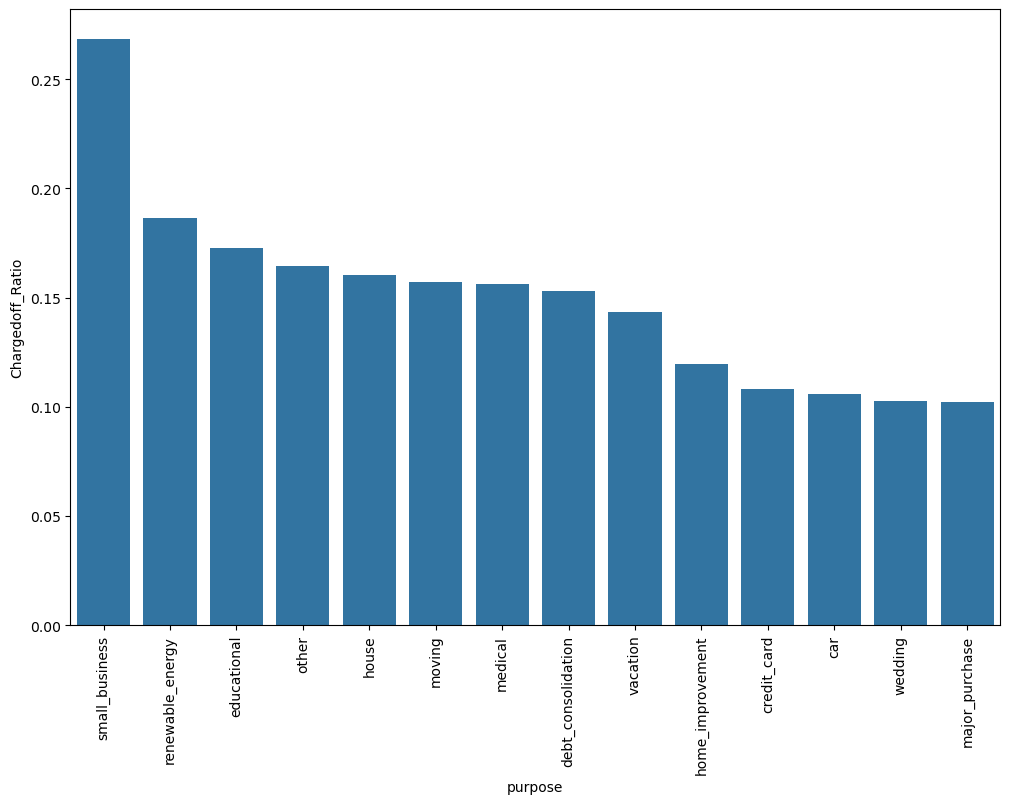

In [531]:
analysis_vs_loan_status(df1,'purpose','loan_status')

<h4>Grade VS Loan Status</h4>

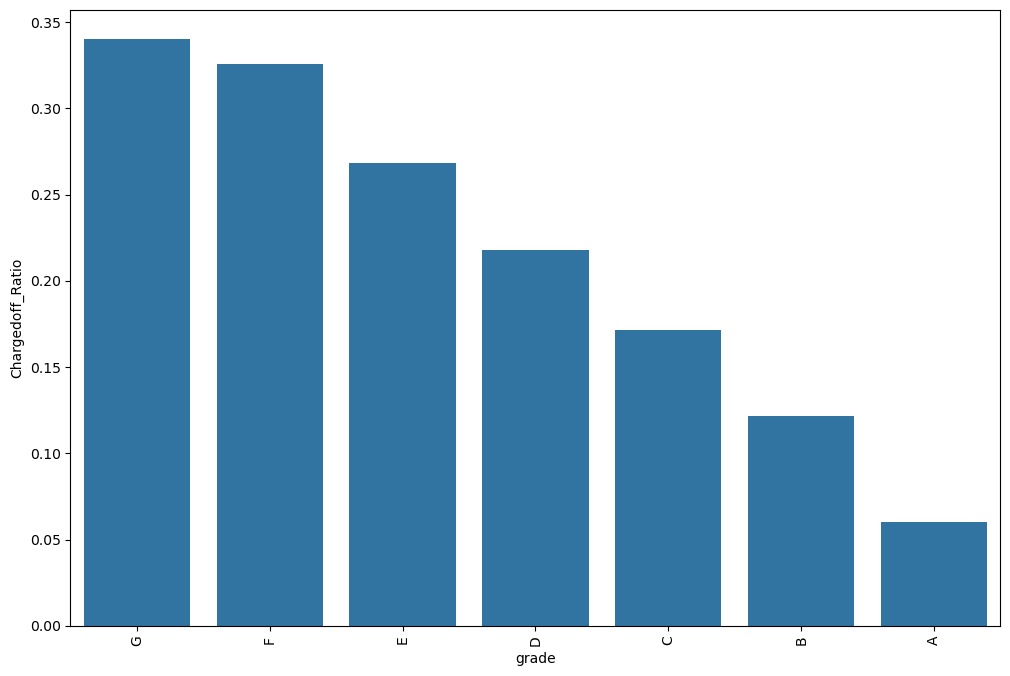

In [540]:
analysis_vs_loan_status(df1,'grade','loan_status')

<h4>Sub Grade VS Loan Status</h4>

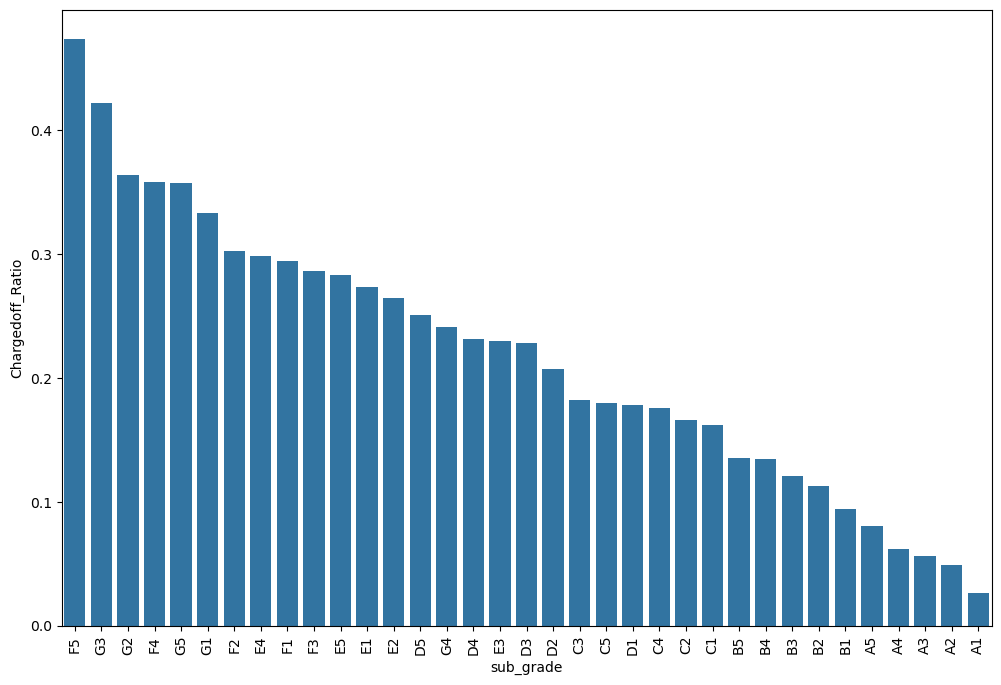

In [543]:
analysis_vs_loan_status(df1,'sub_grade','loan_status')

<h4>Interest Rate VS Loan Status</h4>

In [549]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,int_rate_cat,Defaulted,annual_income_category
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,Medium,0,20000-40000
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,High,1,20000-40000


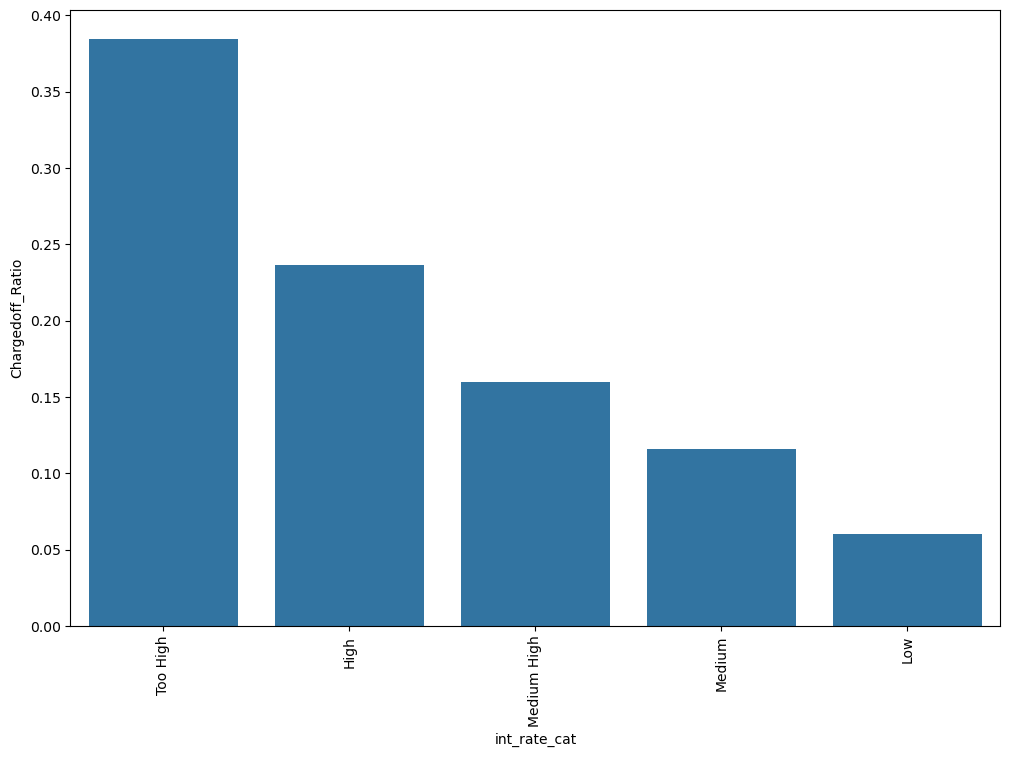

In [551]:
analysis_vs_loan_status(df1,'int_rate_cat','loan_status')

<h4>Employement Length VS Loan Status</h4>

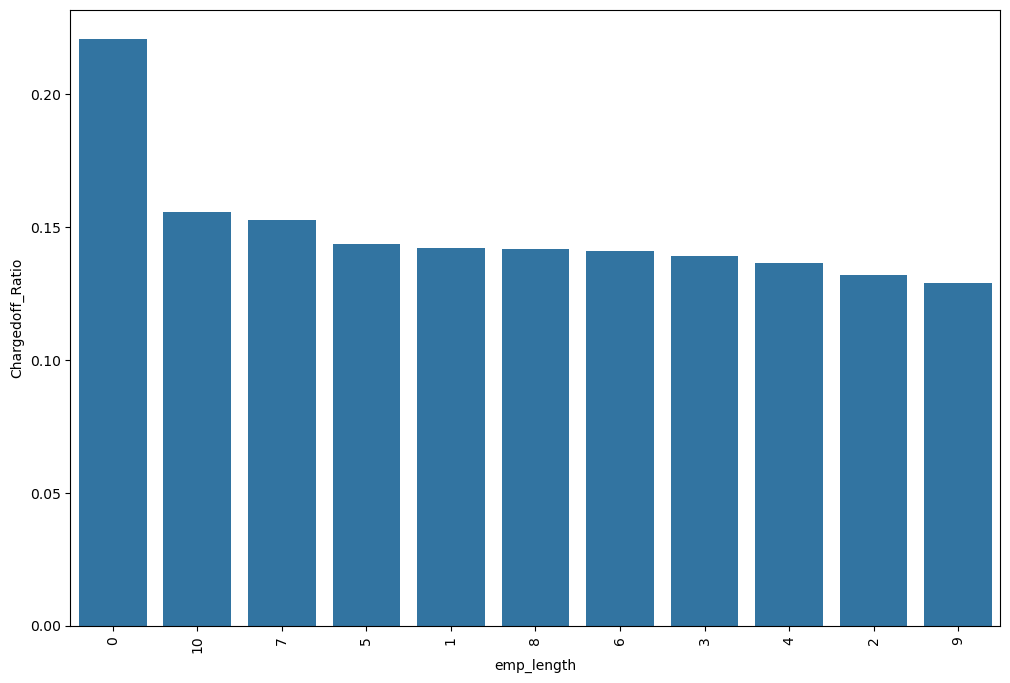

In [554]:
analysis_vs_loan_status(df1,'emp_length','loan_status')

<h4>Applicant state VS Loan Status</h4>

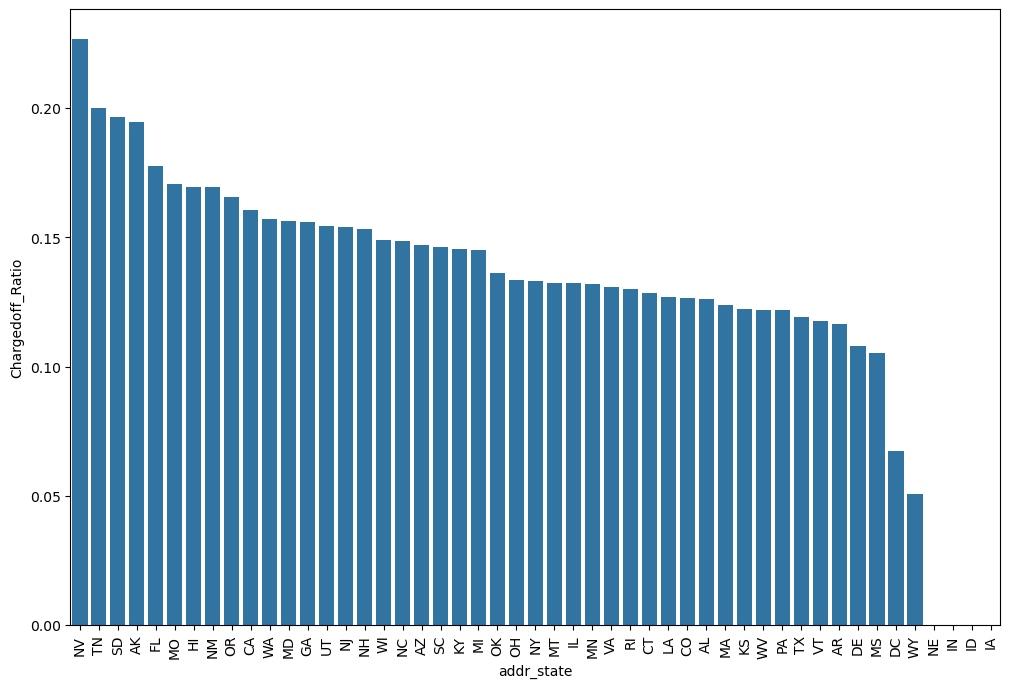

In [557]:
analysis_vs_loan_status(df1,'addr_state','loan_status')

<h4>Purpose Of Loan VS Loan Amount</h4>

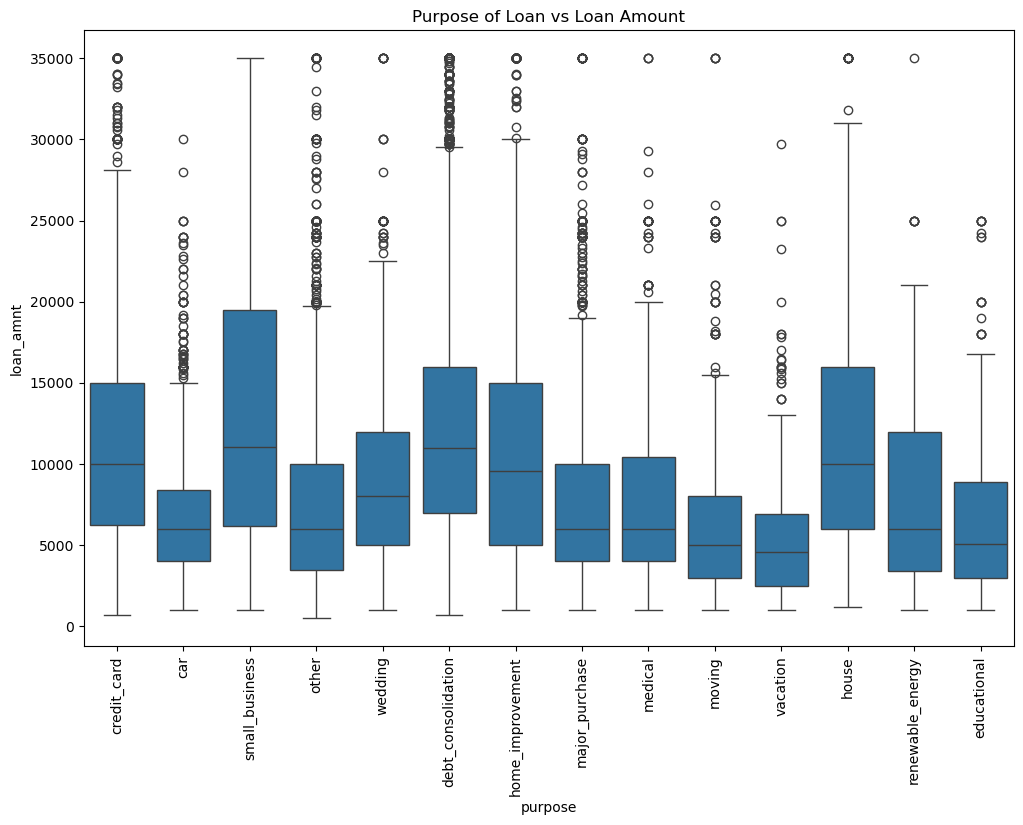

In [562]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='loan_amnt', x='purpose', data =df1)
ax.set_title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

<h4>Term VS Interest Rate</h4>

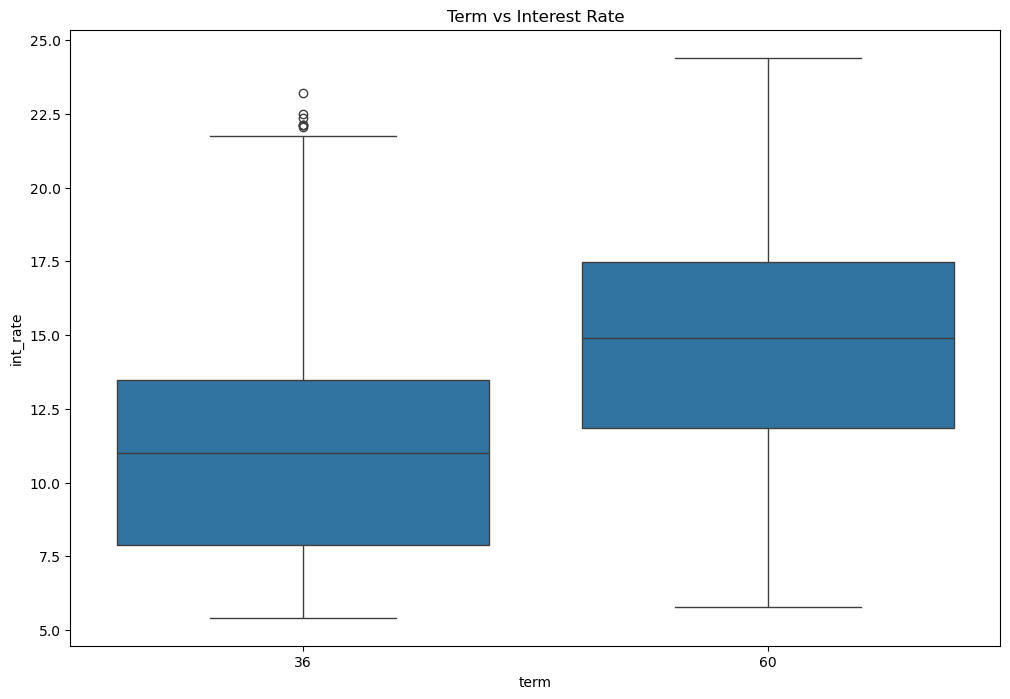

In [567]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='term', data =df1)
ax.set_title('Term vs Interest Rate')
plt.show()

<h4>Purpose VS Interest Rate</h4>

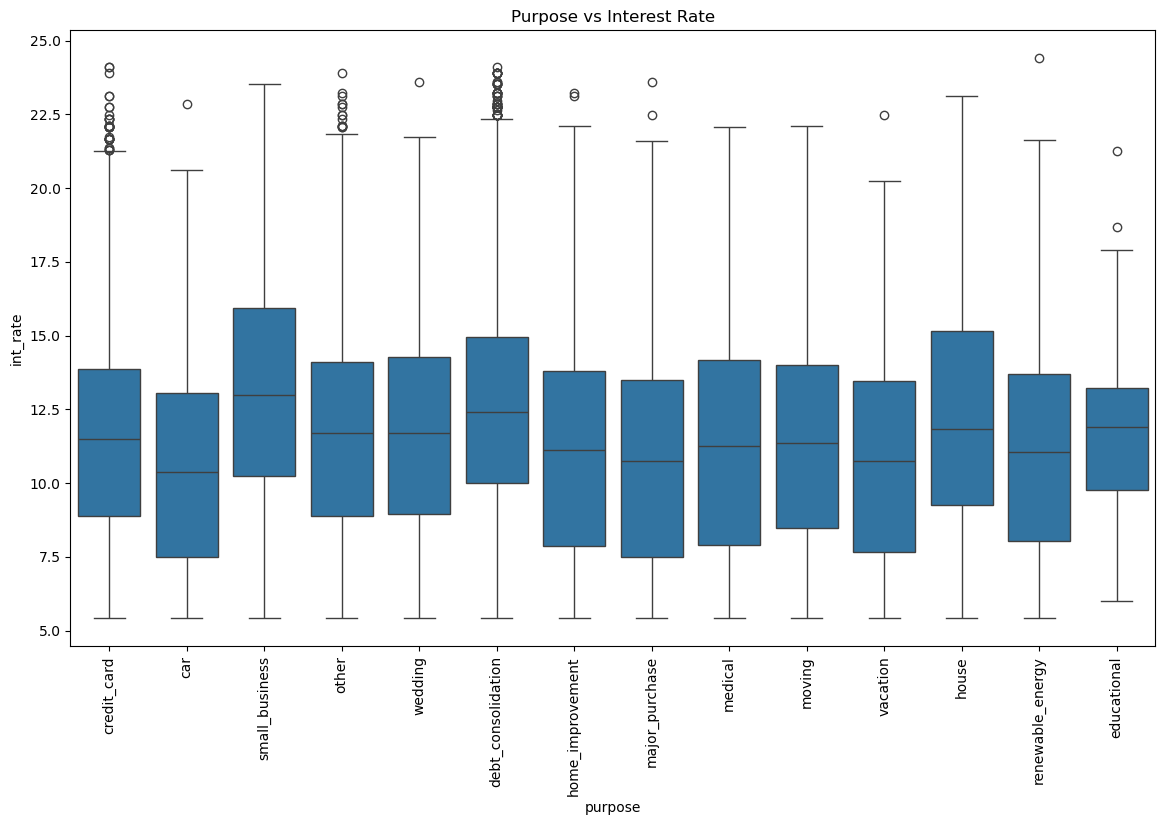

In [572]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='purpose', y='int_rate', data =df1)
ax.set_title('Purpose vs Interest Rate')
plt.xticks(rotation=90)
plt.show()

In [574]:
df1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,int_rate_cat,Defaulted,annual_income_category
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,Medium,0,20000-40000
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,High,1,20000-40000
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,High,0,0-20000
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,Medium High,0,40000-60000
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,Low,0,20000-40000


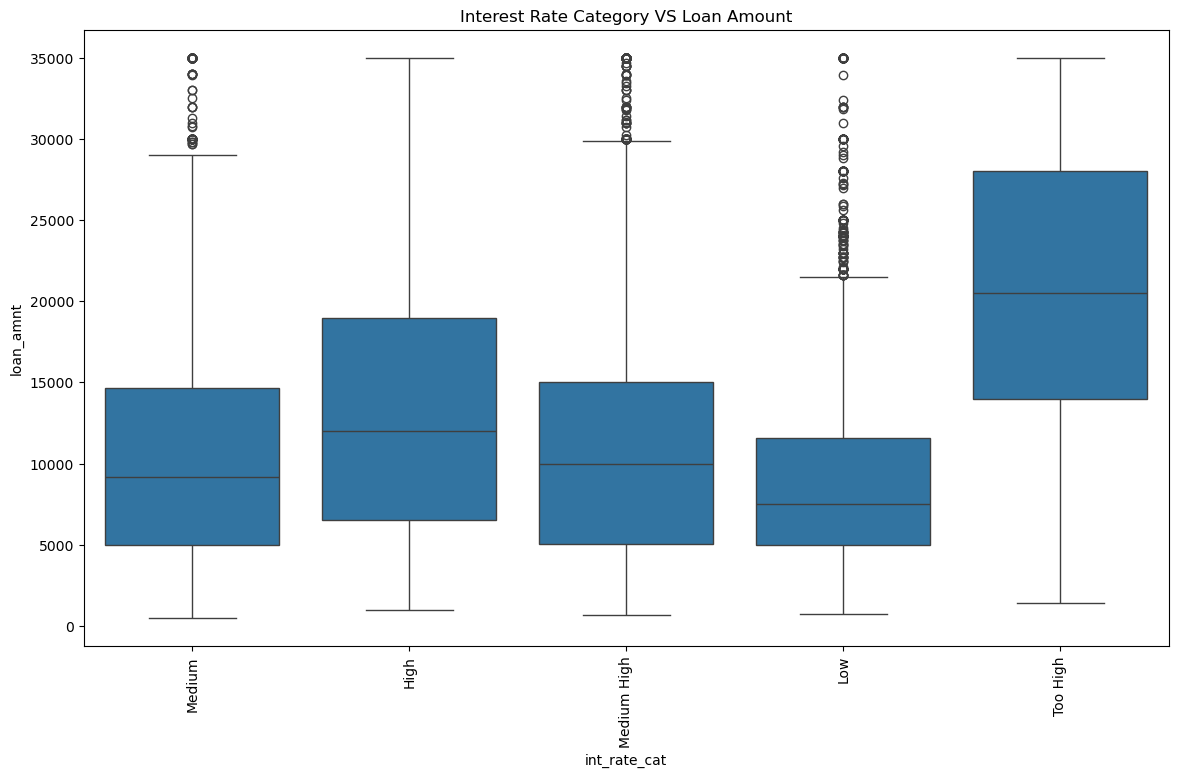

In [576]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate_cat', y='loan_amnt', data =df1)
ax.set_title('Interest Rate Category VS Loan Amount')
plt.xticks(rotation=90)
plt.show()

In [578]:
df1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,int_rate_cat,Defaulted,annual_income_category
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,Medium,0,20000-40000
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,1,...,INDIVIDUAL,0,0.0,0,0.0,2011,12,High,1,20000-40000


In [600]:
df2 = df1[['loan_amnt','term','int_rate','dti','emp_length','annual_inc','pub_rec_bankruptcies']]

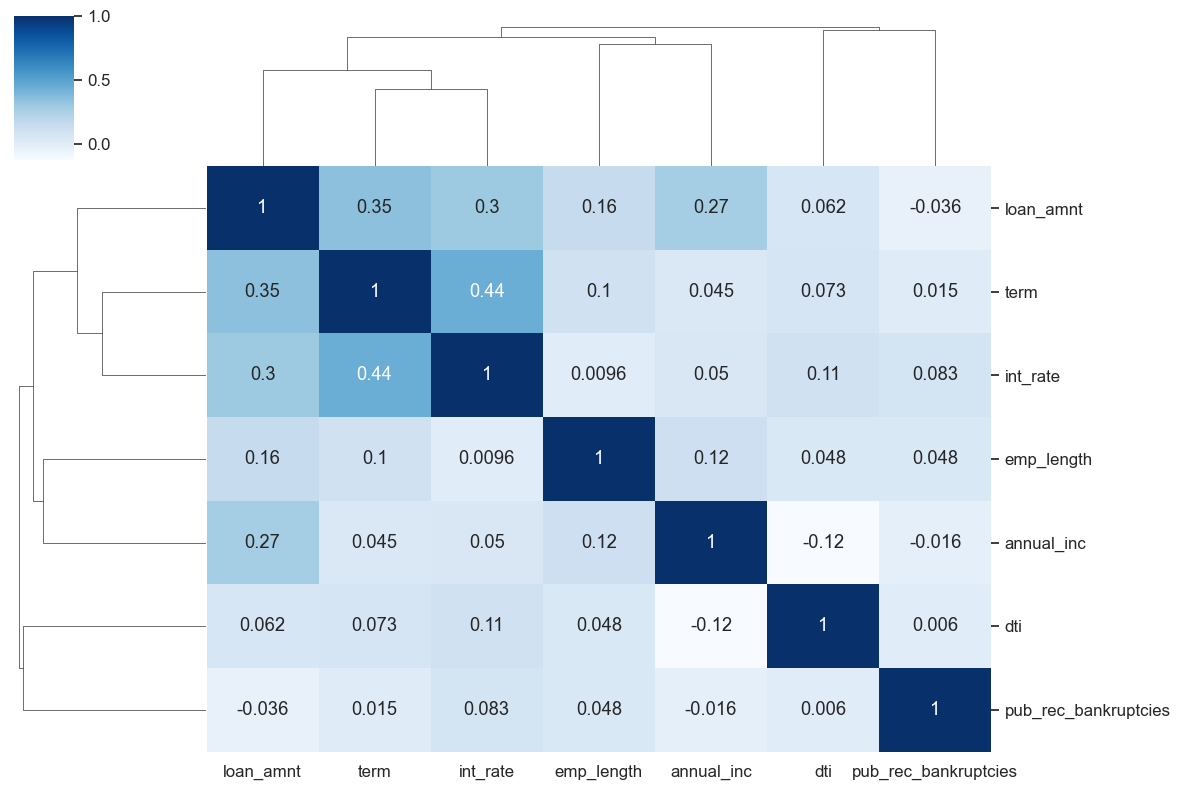

In [602]:
sns.set(font_scale=1.1)
sns.clustermap(df2.corr(), annot=True, figsize=(12, 8), cmap="Blues")
plt.show()